<a href="https://colab.research.google.com/github/preetamjumech/text_analysis/blob/main/Web_Scrapping_by_BeautifulSoup_11_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
movie_reviews = pd.read_csv("Movie_Compiled.csv")
movie_reviews.head()

,Rating,Date,Title,Review
0,,12 April 2012,An Unstoppable Force of Awesomeness! All Hail ...,I have got to tell anyone who will listen that...
1,,19 April 2012,They balanced everything masterfully. As Good ...,"If you're a fan of epic adventure movies, then..."
2,10.0,20 April 2012,The Avengers assembled flawlessly,I'm sorry to say The Avengers isn't a good mov...
3,9.0,16 April 2012,LA Review of 'The Avengers' (No spoilers),LA Review of 'The Avengers' (No spoilers)\r\n\...
4,10.0,2 July 2017,Bad-ass descent-amazing superhero MCU action f...,Marvel's The Avengers (2012) is an awesome des...


In [5]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  4175 non-null   object
 1   Date    4502 non-null   object
 2   Title   4502 non-null   object
 3   Review  4402 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [6]:
movie_reviews.Rating.value_counts()

10.0    1173
1.0      722
9.0      454
8.0      323
7.0      298
6.0      256
5.0      234
3.0      225
2.0      218
4.0      205
          67
Name: Rating, dtype: int64

In [8]:
movie_reviews.Rating.value_counts().index

Index(['10.0', '1.0', '9.0', '8.0', '7.0', '6.0', '5.0', '3.0', '2.0', '4.0',
       ' '],
      dtype='object')

In [9]:
def convert_number(x):
  try:
    return float(x)
  except:
    return np.nan

In [10]:
movie_reviews["Rating"] = movie_reviews.Rating.map(convert_number)

In [11]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  4108 non-null   float64
 1   Date    4502 non-null   object 
 2   Title   4502 non-null   object 
 3   Review  4402 non-null   object 
dtypes: float64(1), object(3)
memory usage: 140.8+ KB


In [13]:
movie_reviews_new = movie_reviews[~movie_reviews["Review"].isnull()]
movie_reviews_new.shape

(4402, 4)

In [16]:
movie_reviews_new["Rating"].value_counts()

10.0    1143
1.0      719
9.0      428
8.0      301
7.0      288
6.0      252
5.0      232
3.0      225
2.0      218
4.0      202
Name: Rating, dtype: int64

In [17]:
movie_reviews_new["Rating"].isnull().sum()

394

In [18]:
only_reviews = " ".join(movie_reviews_new.Review)

In [23]:
wc = WordCloud(width=1200,height=800,max_words=200,stopwords = STOPWORDS,background_color="white")

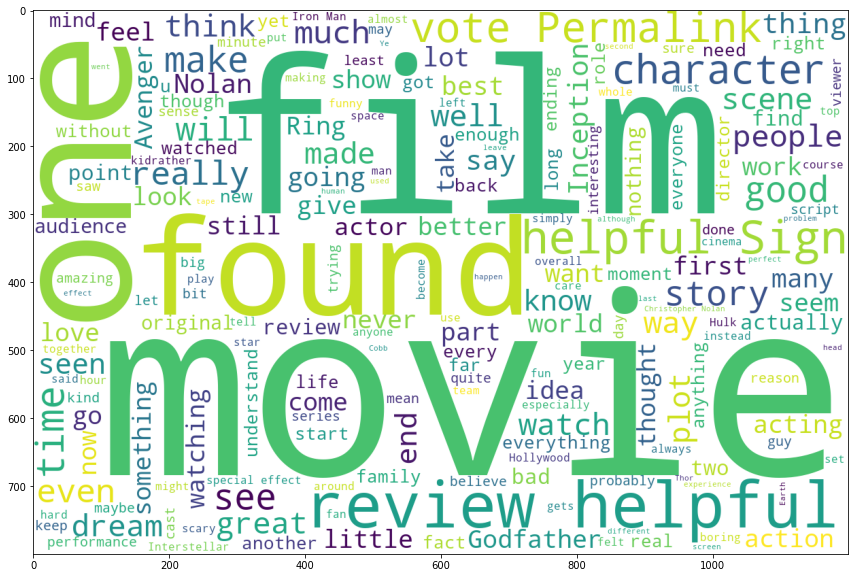

In [24]:
plt.figure(figsize=(16,10))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [61]:
tf = CountVectorizer(token_pattern="[a-z']+",max_df=0.35,min_df=10,stop_words=STOPWORDS,ngram_range=(2,2))

In [62]:
tf_mat = tf.fit_transform(movie_reviews_new.Review)
tf_mat

<4402x2968 sparse matrix of type '<class 'numpy.int64'>'
	with 66858 stored elements in Compressed Sparse Row format>

In [63]:
tf_mat[0]

<1x2968 sparse matrix of type '<class 'numpy.int64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [64]:
tf.vocabulary_

{'one best': 1875,
 'movies seen': 1718,
 'almost impossible': 61,
 'expectations high': 605,
 'see movie': 2328,
 'movie good': 1567,
 'describe movie': 421,
 'movie awesome': 1495,
 'every little': 575,
 'see one': 2330,
 'one many': 1916,
 'many things': 1403,
 'together fight': 2645,
 'many characters': 1386,
 'larger life': 1218,
 'people even': 2002,
 'widow hawkeye': 2851,
 'captain america': 270,
 'entire cast': 542,
 'mark ruffalo': 1411,
 'every actor': 569,
 'seen better': 2340,
 'every single': 585,
 'iron man': 1147,
 'scarlett johansson': 2281,
 'character arcs': 285,
 'course film': 383,
 'film will': 800,
 'want give': 2740,
 'give away': 886,
 'away movie': 130,
 'movie review': 1634,
 'one film': 1891,
 'every scene': 583,
 'saw movie': 2263,
 'even though': 565,
 'avengers movie': 125,
 'going say': 923,
 'hulk thor': 1094,
 'must see': 1757,
 'type film': 2697,
 'instant classic': 1137,
 'movie really': 1631,
 'high quality': 1061,
 'previous work': 2099,
 'popcorn 

In [65]:
word_freq = np.array(tf_mat.sum(axis = 0)).reshape(tf_mat.shape[1],)

In [66]:
word_freq

array([11, 22, 28, ..., 11, 18, 10])

In [67]:
len(word_freq)

2968

In [68]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse[2]

"'the ring'"

In [69]:
tf.vocabulary_.items()

dict_items([('one best', 1875), ('movies seen', 1718), ('almost impossible', 61), ('expectations high', 605), ('see movie', 2328), ('movie good', 1567), ('describe movie', 421), ('movie awesome', 1495), ('every little', 575), ('see one', 2330), ('one many', 1916), ('many things', 1403), ('together fight', 2645), ('many characters', 1386), ('larger life', 1218), ('people even', 2002), ('widow hawkeye', 2851), ('captain america', 270), ('entire cast', 542), ('mark ruffalo', 1411), ('every actor', 569), ('seen better', 2340), ('every single', 585), ('iron man', 1147), ('scarlett johansson', 2281), ('character arcs', 285), ('course film', 383), ('film will', 800), ('want give', 2740), ('give away', 886), ('away movie', 130), ('movie review', 1634), ('one film', 1891), ('every scene', 583), ('saw movie', 2263), ('even though', 565), ('avengers movie', 125), ('going say', 923), ('hulk thor', 1094), ('must see', 1757), ('type film', 2697), ('instant classic', 1137), ('movie really', 1631), ('

In [70]:
word_freq[2]

28

In [71]:
word_freq_dict = {}
for k,v in tf.vocabulary_.items():
  v = word_freq[v]
  word_freq_dict[k] = v

In [72]:
word_freq_dict_sorted = {k:v for k,v in sorted(word_freq_dict.items(),key = lambda item: item[1],reverse=True)}
word_freq_dict_sorted

{'special effects': 441,
 'iron man': 427,
 'sci fi': 350,
 'ice age': 309,
 'christopher nolan': 306,
 'captain america': 299,
 'good movie': 292,
 'dark knight': 272,
 'one best': 269,
 'al pacino': 244,
 'marlon brando': 239,
 'movie good': 232,
 'black hole': 218,
 'even though': 199,
 'naomi watts': 198,
 'see movie': 194,
 'comic book': 190,
 'black widow': 179,
 'infinity war': 169,
 'great movie': 168,
 'joss whedon': 161,
 'character development': 158,
 'go see': 158,
 'movie found': 156,
 'science fiction': 155,
 'much better': 154,
 'action scenes': 153,
 'watch movie': 151,
 'horror movie': 147,
 'first time': 145,
 'best movie': 145,
 'plot holes': 143,
 'movie will': 142,
 'movie really': 139,
 'francis ford': 137,
 'movie seen': 136,
 'waste time': 134,
 'ellen page': 134,
 'make sense': 133,
 'movie made': 129,
 'long time': 129,
 'robert downey': 128,
 'seven days': 126,
 'well done': 125,
 'story line': 125,
 'within dream': 125,
 'james caan': 123,
 'downey jr': 122,

In [73]:
word_freq_dict

{'one best': 269,
 'movies seen': 63,
 'almost impossible': 16,
 'expectations high': 11,
 'see movie': 194,
 'movie good': 232,
 'describe movie': 12,
 'movie awesome': 23,
 'every little': 14,
 'see one': 24,
 'one many': 26,
 'many things': 40,
 'together fight': 13,
 'many characters': 61,
 'larger life': 18,
 'people even': 16,
 'widow hawkeye': 24,
 'captain america': 299,
 'entire cast': 18,
 'mark ruffalo': 117,
 'every actor': 19,
 'seen better': 10,
 'every single': 82,
 'iron man': 427,
 'scarlett johansson': 74,
 'character arcs': 10,
 'course film': 11,
 'film will': 92,
 'want give': 11,
 'give away': 20,
 'away movie': 10,
 'movie review': 14,
 'one film': 38,
 'every scene': 66,
 'saw movie': 63,
 'even though': 199,
 'avengers movie': 38,
 'going say': 13,
 'hulk thor': 25,
 'must see': 80,
 'type film': 18,
 'instant classic': 12,
 'movie really': 139,
 'high quality': 13,
 'previous work': 11,
 'popcorn movie': 14,
 'never seen': 82,
 'good film': 78,
 'film made': 8

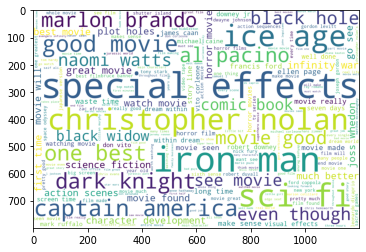

In [74]:
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))